# Mice Down Syndrome Analysis through Protein Expressions

## Description of the Data Set 

The data set consists of the expression levels of 77 proteins that produced detectable signals in the nuclear fraction of the cortex. There are 38 Control mice and 34 Trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per mouse. 
Therefore, for Control mice, there are $38*15 = 570$ measurements, and for Trisomic mice, there are $34*15 = 510$ measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent mouse.  
Some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

The data set includes the following features:

[1] Mouse ID

[2:78] Values of expression levels of 77 proteins; the names of proteins are followed by N indicating that they were measured in the nuclear fraction. 

[79] Genotype: control (c) or trisomy (t)

[80] Treatment type: memantine (m) or saline (s)

[81] Behavior: context-shock (CS) or shock-context (SC)

[82] Class:
*  c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
*  c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
*  c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
*  c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)
*  t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
*  t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
*  t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
*  t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

## Aim
The aim of this project is to identify a subset of proteins that is discriminant between the classes.
## Objective
Perform featrure selection process and develop a classification model. 
## Methods
Decision Tree and Random Forest, Linear and quadratic Discriminant Analysis
## Inference
Explore how the final predictor's (discriminant proteins) influence the $class$ of mice.

## 1) Importing Libraries and Loading Data

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


import os
import pickle

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#print(os.listdir())
print('OS Loaded...') if os.listdir() != None else print('Unable to load directories...')

OS Loaded...


In [41]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls'
mice = pd.read_excel(url)

In [42]:
mice.head(30)

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0    309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1    309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2    309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3    309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4    309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
5    309_6  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578   
6    309_7  0.428033  0.573696  0.342709  2.334224  4.473130  0.225173   
7    309_8  0.416923  0.564036  0.327703  2.260135  4.268735  0.214834   
8    309_9  0.386311  0.538428  0.317720  2.125725  4.063950  0.207222   
9   309_10  0.380827  0.499294  0.362462  2.096266  3.598587  0.227649   
10  309_11  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475   
11  309_12  0.364154  0.499411  0.355124  2.006871  3.466627  0.216333   
12  309_13  0.364873  0.482102  0.312539  1.946201  3.349592  0.230898   
13  309_14  0.381911  0.485914  0.310951  1.958907  3.349290  0.225800   
14  309_15  0.374410  0.462313  0.344629  1.861162  3.287123  0.221811   
15   311_1  0.743118  0.862653  0.377742  2.735757  6.067570  0.219049   
16   311_2  0.711480  0.807054  0.351591  2.546888  5.595574  0.199170   
17   311_3  0.704633  0.802537  0.350110  2.467733  5.548400  0.205323   
18   311_4  0.677359  0.770235  0.356397  2.563223  4.975196  0.228087   
19   311_5  0.591572  0.678768  0.312480  2.164182  4.313938  0.195786   
20   311_6  0.618517  0.716672  0.319701  2.285938  4.571180  0.206927   
21   311_7  0.702608  0.699581  0.387750  2.437587  4.449231  0.258500   
22   311_8  0.598869  0.690271  0.349774  2.308371  4.229412  0.221493   
23   311_9  0.561867  0.641892  0.308488  2.157728  4.020693  0.216427   
24  311_10  0.550970  0.561356  0.320853  2.197868  3.558896  0.237770   
25  311_11  0.538413  0.701865  0.384445  2.482137  4.109706  0.288018   
26  311_12  0.521127  0.583045  0.304279  2.053415  3.381345  0.251661   
27  311_13  0.488372  0.540086  0.291310  1.913403  2.873623  0.215422   
28  311_14  0.514855  0.564791  0.316056  1.957016  2.978824  0.250632   
29  311_15  0.485100  0.556375  0.287250  1.892166  2.847005  0.223041   

     pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N  \
0   0.177565   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698   
1   0.172817   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987   
2   0.175722   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002   
3   0.176463   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087   
4   0.173627   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502   
5   0.176233   2.141282  0.195188  1.442398  0.566340  0.289824  0.363893   
6   0.184004   2.012414  0.195789  1.612036  0.509899  0.299654  0.371150   
7   0.179668   2.007985  0.189803  1.424601  0.501075  0.283016  0.358876   
8   0.167778   1.861514  0.180684  1.261891  0.476653  0.266966  0.337007   
9   0.188093   1.717861  0.188093  1.414329  0.455499  0.324117  0.368315   
10  0.193797   1.724508  0.185283  1.318670  0.461180  0.290290  0.379485   
11  0.204358   1.672556  0.190224  1.166078  0.447193  0.277189  0.361406   
12  0.188821   1.508687  0.171028  1.353360  0.471844  0.272137  0.340590   
13  0.188519   1.509002  0.179835  1.219657  0.463249  0.284262  0.360305   
14  0.185459   1.444239  0.176422  1.123023  0.426987  0.266174  0.325734   
15  0.185338   2.277492  0.194465  2.379508  1.081555  0.355366  0.383630   
16  0.165975   2.118811  0.174689  2.050484  1.075934  0.331950  0.346196   
17  0.165058   2.107281  0.171401  1.938913  1.065637  0.326669  0.342113   
18  0.186498   2.259045  0.190974  2.167848  0.977620  0.358262  0.376912   
19  0.161102   1.975689  0.161912  1.768720  0.838574  0.306321  0.323825   
20  0.171598   2.127045  0.174556  1.767316  0.871389  0.324400  0.337278   
21  0.197019  

## 2) Exploring the Data and Preprocessing

In [43]:
mice.describe(include = 'all')

MouseID     DYRK1A_N      ITSN1_N       BDNF_N        NR1_N  \
count     1080  1077.000000  1077.000000  1077.000000  1077.000000   
unique    1080          NaN          NaN          NaN          NaN   
top      309_1          NaN          NaN          NaN          NaN   
freq         1          NaN          NaN          NaN          NaN   
mean       NaN     0.425810     0.617102     0.319088     2.297269   
std        NaN     0.249362     0.251640     0.049383     0.347293   
min        NaN     0.145327     0.245359     0.115181     1.330831   
25%        NaN     0.288121     0.473361     0.287444     2.057411   
50%        NaN     0.366378     0.565782     0.316564     2.296546   
75%        NaN     0.487711     0.698032     0.348197     2.528481   
max        NaN     2.516367     2.602662     0.497160     3.757641   

             NR2A_N       pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N  \
count   1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       3.843934     0.233168     0.181846     3.537109     0.212574   
std        0.933100     0.041634     0.027042     1.295169     0.032587   
min        1.737540     0.063236     0.064043     1.343998     0.112812   
25%        3.155678     0.205755     0.164595     2.479834     0.190823   
50%        3.760855     0.231177     0.182302     3.326520     0.210594   
75%        4.440011     0.257261     0.197418     4.481940     0.234595   
max        8.482553     0.539050     0.317066     7.464070     0.306247   

             pELK_N       pERK_N       pJNK_N       PKCA_N       pMEK_N  \
count   1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       1.428682     0.545904     0.313505     0.317939     0.275033   
std        0.466904     0.345309     0.051978     0.052236     0.046164   
min        0.429032     0.149155     0.052110     0.191431     0.056818   
25%        1.203665     0.337405     0.281242     0.281829     0.244287   
50%        1.355846     0.443644     0.321330     0.312977     0.277393   
75%        1.561316     0.663297     0.348714     0.352304     0.303450   
max        6.113347     3.566685     0.493426     0.473992     0.458001   

             pNR1_N      pNR2A_N      pNR2B_N     pPKCAB_N       pRSK_N  \
count   1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.825813     0.726933     1.561965     1.525338     0.442848   
std        0.117969     0.188013     0.270737     0.481780     0.066672   
min        0.500160     0.281285     0.301609     0.567840     0.095942   
25%        0.743491     0.590303     1.381288     1.168258     0.404144   
50%        0.821076     0.719591     1.563696     1.365744     0.440598   
75%        0.898460     0.848640     1.748538     1.885899     0.482096   
max        1.408169     1.412750     2.723965     3.061387     0.650962   

              AKT_N       BRAF_N     CAMKII_N       CREB_N        ELK_N  \
count   1077.000000  1077.000000  1077.000000  1077.000000  1062.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.682236     0.378519     0.363357     0.180492     1.173400   
std        0.

In [44]:
mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

### While describing and finding information about dataset we revealed that there are some categorical columns and some null values.

### 2.1) Categorical Features
#### 2.1.1) Exploring the categorical columns.

Genotype:
Control    570
Ts65Dn     510
Name: Genotype, dtype: int64


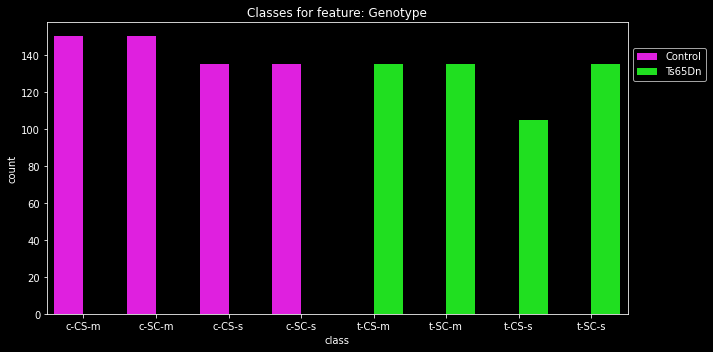

In [45]:
print('Genotype:',mice['Genotype'].value_counts(), sep = '\n')
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=mice, hue='Genotype',palette=['magenta','lime'])
plt.legend(loc=(1.01,0.8))
plt.title('Classes for feature: Genotype')
plt.tight_layout()

Treatment:
Memantine    570
Saline       510
Name: Treatment, dtype: int64


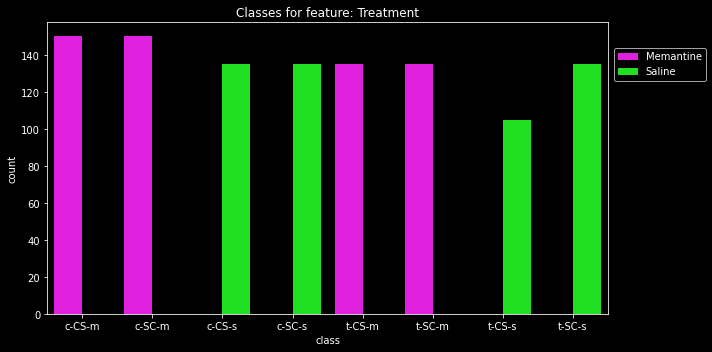

In [46]:
print('Treatment:', mice['Treatment'].value_counts(), sep = '\n')
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=mice, hue='Treatment',palette=['magenta','lime'])
plt.legend(loc=(1.01,0.8))
plt.title('Classes for feature: Treatment')
plt.tight_layout()

Behavior:
S/C    555
C/S    525
Name: Behavior, dtype: int64


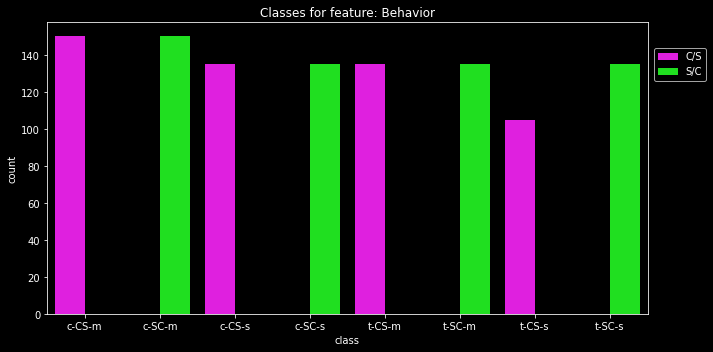

In [47]:
print('Behavior:', mice['Behavior'].value_counts(), sep = '\n')
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=mice, hue='Behavior',palette=['magenta','lime'])
plt.legend(loc=(1.01,0.8))
plt.title('Classes for feature: Behavior')
plt.tight_layout()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64


<AxesSubplot:title={'center':'class_proportions'}, ylabel='class'>

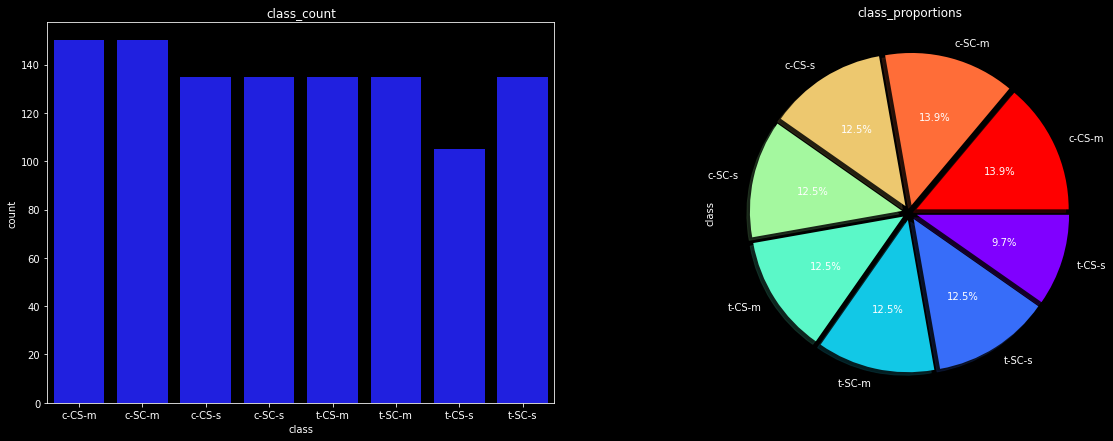

In [48]:
#info about classes

print(mice['class'].value_counts())

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('class_count')
sns.countplot(x='class', data=mice, color='blue')
plt.subplot(1,2,2)
plt.title('class_proportions')
mice['class'].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, cmap = 'rainbow_r', explode = [0.05]*8)

Till now we just explored the data that was given in our dataset description.  
Finally, we found that the eight *classes* of mice are described based on the features *genotype*, *behavior* and *treatment*.

Now let's treat the categorical features.  
There are three binary variables $Genotype$, $Treatment$ and $Behavior$ which can be transformed to integer.
For sure, we can also transform the $Class$ feature.

#### 2.1.2) Encoding the Categorical columns

As $Genotype$, $Treatment$ and $Behavior$ directly contribute to determining the $Class$ of mice, we can drop them from the dataset.

Encode the target variable $Class$ to integer.

In [49]:
mice = mice.drop(['Genotype','Treatment','Behavior'], axis=1)

y = np.vectorize({'c-CS-m':0,'c-CS-s':1,'c-SC-m':2,'c-SC-s':3,'t-CS-m':4,'t-CS-s':5,'t-SC-m':6,'t-SC-s':7}.get)(mice['class'])

In [50]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [51]:
mice.sample(30)

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
31        320_2  0.651253  0.962021  0.464964  2.992689  5.975028  0.202810   
604      3417_5  0.434018  0.563343  0.241056  1.720235  2.727859  0.187097   
591      3416_7  0.474654  0.671429  0.294931  2.251920  3.322581  0.204455   
269      362_15  0.295302  0.451999  0.278669  1.708491  2.341406  0.210388   
258       362_4  0.353026  0.558196  0.286402  2.104030  3.186547  0.218013   
316      3478_2  0.427417  0.723227  0.432893  2.939673  5.384910  0.234440   
104     3499_15  0.233551  0.370550  0.215843  1.742964  2.528052  0.193849   
402   50810A_13  0.280024  0.469071  0.278817  2.064122  3.104858  0.192667   
436      3422_2  0.298968  0.480565  0.315214  2.626784  4.473428  0.232007   
747     3418_13  0.263079  0.390732  0.294469  1.843049  2.552167  0.235575   
283      364_14  0.209583  0.420929  0.258377  2.279541  3.014697  0.267490   
1002    3491_13  0.432007  0.538838  0.358587  2.208129  2.952543  0.285593   
302      3477_3  0.598902  0.886041  0.444760  2.918261  5.717712  0.290435   
1037     3525_3  0.441198  0.734952  0.443358  2.978290  6.201461  0.296738   
672     3522_13  0.570857  0.717571  0.326418  2.269183  3.827043  0.274931   
292       365_8  0.242337  0.460835  0.292705  2.301667  3.684531  0.245564   
200      3419_6  0.308085  0.402272  0.258192  1.800099  3.008892  0.237280   
510      3489_1  0.312913  0.510041  0.350153  2.862354  4.561769  0.237290   
194     3413_15  0.171823  0.299475  0.228644  1.687682  2.703833  0.186028   
571      3414_2  0.938245  1.077099  0.366149  2.703612  4.484228  0.197465   
97       3499_8  0.287307  0.457690  0.264008  2.003859  3.103774  0.185106   
396    50810A_7  0.322757  0.558407  0.318816  2.425020  3.940380  0.199070   
783      3530_4  0.343284  0.576451  0.323881  2.755390  4.482090  0.259204   
142      3521_8  0.639174  0.843304  0.344837  2.389340  4.126449  0.237841   
63        322_4  0.384859  0.540699  0.322270  2.177809  4.799273  0.231863   
25       311_11  0.538413  0.701865  0.384445  2.482137  4.109706  0.288018   
484      3481_5  0.305103  0.483791  0.307275  2.704669  4.639367  0.223825   
765      3502_1  0.281036  0.563611  0.376907  2.528481  4.990763  0.280896   
1007     3513_3  0.425481  0.698032  0.380381  2.874973  5.279689  0.254056   
189     3413_10  0.164330  0.290535  0.212387  1.670465  2.819603  0.170172   

       pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N  \
31    0.188473   1.807824  0.259020  1.960691  1.053551  0.353874  0.362704   
604   0.146628   2.394868  0.180205  1.286657  0.657918  0.250293  0.223460   
591   0.185868   2.247619  0.187404  1.328571  0.609063  0.246083  0.331336   
269   0.181792   2.833966  0.168077  1.122556  0.329734  0.269624  0.259411   
258   0.168085   4.091026  0.178841  1.228769  0.361856  0.285921  0.273078   
316   0.169854   3.541551  0.238960  1.575278  0.521905  0.328147  0.412031   
104   0.139236   2.318733  0.135135  0.812302  0.338677  0.223113  0.273253   
402   0.169734   1.997586  0.173657  1.002565  0.532136  0.276705  0.338262   
436   0.175068   4.259338  0.201488  1.329335  0.333283  0.314607  0.326754   
747   0.197010   1.810762  0.184753  1.387444  0.276233  0.280717  0.287593   
283   0.167842   4.345091  0.278366  1.580835  0.257790  0.331864  0.266608   
1002  0.206853   5.234092  0.267291  1.401788  0.469249  0.394552  0.428176   
302   0.197162   4.497666  0.282288  1.998902  0.974645  0.405584  0.450801   
1037  0.188497   6.572487  0.299208  1.715711  0.458689  0.397057  0.462805   
672   0.202449   5.930767  0.221695  1.647588  0.597101  0.327668  0.411647   
292   0.179423   4.302922  0.208460  1.250403  0.310808  0.352214  0.290554   
200   0.175860   4.405236  0.198584  1.057303  0.361930  0.322740  0.263132   
510   0.193696   3.186070  0.251525  1.350915  0.353711  0.349390  0.302364   
194   0.154894   3.755400  0.147305  1.024713  0.277097  

### 2.2) Missing Values

#### 2.2.1) Exploring the missing values
#### Plotting Missing value through Heatmap

total number of missing values: 1396


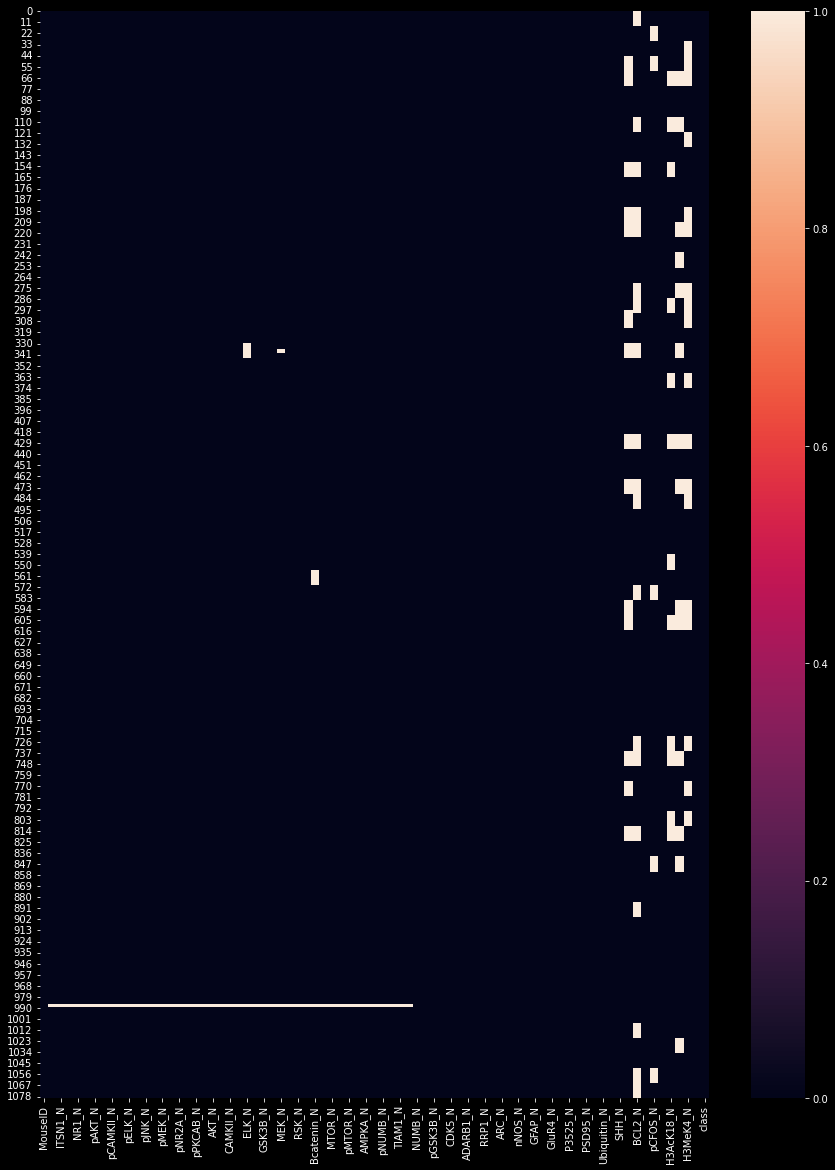

In [52]:
#count and visualize missing values
print('total number of missing values:',mice.isnull().sum().sum())
plt.figure(figsize = (15, 20))
sns.heatmap(mice.isnull());

#### Finding number of Null values in the dataset and sorting it in descending order

In [53]:
mice.isnull().sum().sort_values(ascending = False)

BCL2_N             285
H3MeK4_N           270
BAD_N              213
EGR1_N             210
H3AcK18_N          180
pCFOS_N             75
ELK_N               18
Bcatenin_N          18
MEK_N                7
P38_N                3
JNK_N                3
TRKA_N               3
APP_N                3
SOD1_N               3
MTOR_N               3
NR2B_N               3
pMTOR_N              3
DSCR1_N              3
AMPKA_N              3
GSK3B_N              3
pNUMB_N              3
RAPTOR_N             3
TIAM1_N              3
pP70S6_N             3
DYRK1A_N             3
RSK_N                3
ERK_N                3
pJNK_N               3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
CREB_N               3
pCREB_N              3
pELK_N               3
pERK_N               3
pCAMKII_N            3
PKCA_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N   

#### Finding the Percentage of Missing values in each column

In [54]:
# Column-wise missing data

total = mice.isnull().sum().sort_values(ascending=False)
percent = (mice.isnull().sum()/mice.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print('Column-wise missing data')
missing_data.head(10)

Column-wise missing data


Total   Percent
BCL2_N        285  0.263889
H3MeK4_N      270  0.250000
BAD_N         213  0.197222
EGR1_N        210  0.194444
H3AcK18_N     180  0.166667
pCFOS_N        75  0.069444
ELK_N          18  0.016667
Bcatenin_N     18  0.016667
MEK_N           7  0.006481
P38_N           3  0.002778

#### Finding the Percentage of Missing values in each row

In [55]:
# Row-wise missing values

total = mice.isnull().sum(axis = 1).sort_values(ascending=False)
percent = (mice.isnull().sum(axis = 1)/mice.isnull().count(axis = 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print('Row-wise missing values')
missing_data.head(10)

Row-wise missing values


Total   Percent
989     43  0.544304
988     43  0.544304
987     43  0.544304
425      5  0.063291
431      5  0.063291
430      5  0.063291
429      5  0.063291
339      5  0.063291
427      5  0.063291
426      5  0.063291

Insights about missing values from above heatmap:
* There are three observations(rows) with missings in more than half of the variables. I will exclude these observations from the dataset.
* Some columns are also having misssing values

Idea about dealing with the null values:
* Simply delete those observations with most missings.  
* We won't remove the columns that contain numerous missing values, because there are five such columns, and they may contain important informations.

#### 2.2.2) Dealing the missing values


#### a) Missing values in Rows
##### Droping observations with most missing

In [56]:
mice1 = mice.dropna(how='any', thresh=40)
mice1.shape

(1077, 79)

#### b) Missing values in Columns

For dealing with missing values in columns we have two options:  
* One is to perform correlation analysis and see if the columns with most (>100) missing values correlate highly with other columns that are complete. In this case we can delete the one with most missing values.  
* Second, we have to impute the missing values, cause deleting columns may hamper the data.

Before finding the correlations let's form a new Dataframe without any missings cause missing data wont help in building any correlatiions.

##### Splitting Mouseid by '_' which helps to identify number of mouse and version of test

In [57]:
mice1[['number', 'version']] = mice1.MouseID.str.split('_',expand=True)
mice1 = mice1.drop('MouseID',axis = 1)
cols = list(mice1.columns[-2:])+list(mice1.columns[:-2])
mice1 = mice1[cols]

C:\Users\Rohan\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [58]:
mice1.version = mice1.version.astype('int')

In [59]:
mice1.dtypes

number              object
version              int32
DYRK1A_N           float64
ITSN1_N            float64
BDNF_N             float64
NR1_N              float64
NR2A_N             float64
pAKT_N             float64
pBRAF_N            float64
pCAMKII_N          float64
pCREB_N            float64
pELK_N             float64
pERK_N             float64
pJNK_N             float64
PKCA_N             float64
pMEK_N             float64
pNR1_N             float64
pNR2A_N            float64
pNR2B_N            float64
pPKCAB_N           float64
pRSK_N             float64
AKT_N              float64
BRAF_N             float64
CAMKII_N           float64
CREB_N             float64
ELK_N              float64
ERK_N              float64
GSK3B_N            float64
JNK_N              float64
MEK_N              float64
TRKA_N             float64
RSK_N              float64
APP_N              float64
Bcatenin_N         float64
SOD1_N             float64
MTOR_N             float64
P38_N              float64
p

In [60]:
mice1.sample(50)

number  version  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N  \
499     3488        5  0.304427  0.472235  0.306557  2.459760  3.572341   
173     3412        9  0.287296  0.442345  0.294463  2.271661  3.709446   
930   50810E        1  0.573992  0.933114  0.376710  2.629863  4.490940   
740     3418        6  0.286352  0.481460  0.312561  2.305572  3.874005   
652     3505        8  0.784336  0.900114  0.361237  2.420687  4.383087   
261      362        7  0.336896  0.508494  0.276961  1.966215  3.008017   
123     3520        4  0.669722  0.911734  0.369172  2.754584  4.451807   
291      365        7  0.266736  0.445252  0.281439  2.186127  3.363951   
74       322       15  0.341450  0.472330  0.321251  2.011068  3.499723   
661     3522        2  0.751167  1.043822  0.390778  2.868248  5.130132   
767     3502        3  0.308938  0.586756  0.397755  2.673014  6.215859   
869     3476       15  0.392590  0.521628  0.289834  1.792298  2.359737   
65       322        6  0.362915  0.555485  0.323543  2.252580  4.806477   
607     3417        8  0.403018  0.530091  0.237377  1.603317  2.509409   
792     3530       13  0.278592  0.522287  0.307038  2.351613  3.078886   
423   50810F        4  0.492403  0.658379  0.339319  2.446823  4.613029   
46       321        2  0.516108  0.749622  0.401297  2.919243  6.306811   
26       311       12  0.521127  0.583045  0.304279  2.053415  3.381345   
667     3522        8  0.513901  0.807414  0.309007  2.232551  3.817695   
66       322        7  0.359692  0.500887  0.303490  2.069809  4.102347   
1000    3491       11  0.468945  0.568255  0.385962  2.250126  3.358021   
894     3498       10  0.743142  0.839056  0.245156  1.838481  2.917130   
200     3419        6  0.308085  0.402272  0.258192  1.800099  3.008892   
1041    3525        7  0.382195  0.603457  0.383499  2.470895  4.552258   
533     3490        9  0.298369  0.510549  0.342062  2.637887  4.506359   
223     3420       14  0.229536  0.384379  0.335948  1.893929  2.663711   
442     3422        8  0.293135  0.453547  0.308009  2.392220  3.738902   
336     3479        7  0.396337  0.571942  0.307390  2.193264  3.833715   
95      3499        6  0.357394  0.550142  0.306516  2.428669  3.843513   
830     3606        6  0.414507  0.675031  0.276841  2.202249  4.440011   
511     3489        2  0.312687  0.513105  0.361586  2.937671  5.005607   
510     3489        1  0.312913  0.510041  0.350153  2.862354  4.561769   
846    18899        7  0.395156  0.561862  0.270482  1.912610  3.281168   
594     3416       10  0.418401  0.535349  0.279319  1.909812  2.686653   
924   50810C       10  0.428083  0.749028  0.312549  2.284870  3.634738   
130     3520       11  0.618440  0.691825  0.313193  2.379469  3.329082   
915   50810C        1  0.583923  0.962748  0.442336  2.883552  4.420139   
330     3479        1  0.487969  0.659720  0.360817  2.480217  4.474278   
800     3534        6  0.399507  0.662322  0.318478  2.536023  4.820151   
549     3516       10  0.230490  0.315417  0.262242  1.824598  2.756886   
685      361       11  0.397928  0.553484  0.331450  2.256685  3.959699   
205     3419       11  0.267745  0.409186  0.280010  1.867171  2.740084   
478     3424       14  0.340412  0.496768  0.330563  2.364420  2.955679   
447     3422       13  0.295595  0.395759  0.308646  2.084502  2.831648   
281      364       12  0.273983  0.434894  0.317728  2.385521  3.220261   
248     3503        9  0.248883  0.394210  0.315329  2.051486  3.634350   
824     3605       15  0.408917  0.580573  0.373885  2.309554  3.514331   
382     3497        8  0.380214  0.511301  0.251711  1.908433  3.793103   
233     3500        9  0.273096  0.471667  0.265628  2.114467  3.715214   
692      363        3  0.774384  1.046803  0.353698  2.586188  4.151429   

        pAKT_N   pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N  \
499   0.189107  0.158679   3.215883  0.224707  1.538567  0.335311  0.272174   
173   0.262758  0.1982

### 2.3) Imputation
Imputing the missing values with:
* **mean** of the attribute for each mouse(number)
* **0** in case all the values of an attribute is missing for a mouse(number).

In [61]:
mice_updated = mice1.set_index('number').copy()
mice_updated.update(mice1.groupby('number').mean().fillna(0), overwrite=False)
mice_updated.reset_index(inplace=True)
mice_updated.sample(50)

number  version  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N  \
848    18899        9  0.408065  0.607777  0.308209  2.096976  3.567931   
668     3522        9  0.569612  0.713120  0.294898  2.132863  3.787087   
1011    3513       10  0.357000  0.526073  0.332732  2.373446  3.885078   
176     3412       12  0.265617  0.403048  0.321589  2.180160  3.184658   
553     3516       14  0.180628  0.275305  0.215969  1.554538  2.138089   
712      293        8  0.248980  0.515908  0.279165  2.229564  3.390439   
366     3484        7  1.539048  1.635397  0.354444  2.462857  4.676667   
766     3502        2  0.293219  0.578158  0.405282  2.686510  5.411991   
954     3421       10  0.238836  0.384145  0.234618  1.440000  1.928436   
796     3534        2  0.436950  0.675744  0.331378  2.742215  5.073034   
895     3498       11  0.754728  0.875534  0.266423  1.968477  2.971934   
691      363        2  0.862425  1.071260  0.342218  2.545787  4.052880   
1042    3525       11  0.382149  0.595792  0.399101  2.527574  4.629493   
767     3502        3  0.308938  0.586756  0.397755  2.673014  6.215859   
860     3476        6  0.457483  0.728561  0.304108  2.213548  3.558131   
29       311       15  0.485100  0.556375  0.287250  1.892166  2.847005   
266      362       12  0.311823  0.477068  0.249597  1.815165  2.529154   
132     3520       13  0.511770  0.678274  0.305297  2.210397  3.029671   
765     3502        1  0.281036  0.563611  0.376907  2.528481  4.990763   
252     3503       13  0.290638  0.333142  0.268237  1.838599  2.613441   
669     3522       10  0.578981  0.722620  0.330666  2.375105  4.209351   
925   50810C       11  0.441585  0.761387  0.301582  2.342337  3.844334   
314     3477       15  0.431479  0.560793  0.346471  2.031685  3.595054   
360     3484        1  2.480316  2.488684  0.437048  3.126094  6.003804   
735     3418        1  0.330477  0.567582  0.355307  2.735094  4.751005   
83      3415        9  0.508725  0.655302  0.305906  2.415705  4.338523   
513     3489        4  0.262720  0.471840  0.327680  2.641280  4.250880   
834     3606       10  0.369756  0.572539  0.272151  1.903213  3.255781   
1041    3525       10  0.364488  0.587427  0.420483  2.543714  4.521857   
1        309        2  0.514617  0.689064  0.411770  2.789514  5.685038   
896     3498       12  0.718856  0.935593  0.282203  2.070975  3.163559   
526     3490        2  0.347258  0.580863  0.400982  2.936551  5.334198   
59       321       15  0.385658  0.583312  0.331943  2.429726  4.066493   
279      364       10  0.249807  0.471513  0.310131  2.345450  3.303429   
807     3534       13  0.340853  0.520396  0.322621  2.232077  3.175525   
78      3415        4  0.576815  0.755390  0.348346  2.624901  4.727509   
901   50810B        2  0.704525  0.962142  0.343922  2.618719  4.739986   
339     3479       10  0.487528  0.659159  0.343634  2.431124  3.668838   
559    J2292        5  0.242445  0.378722  0.349615  2.405375  4.754544   
303     3477        4  0.544844  0.726999  0.390846  2.521089  4.967323   
130     3520       11  0.618440  0.691825  0.313193  2.379469  3.329082   
286      365        2  0.309432  0.539782  0.347400  2.544861  4.586578   
568    J2292       14  0.237821  0.371795  0.342094  2.206197  3.952778   
1012    3513       11  0.324592  0.482120  0.292500  2.145425  3.425454   
531     3490        7  0.275488  0.469842  0.317411  2.457436  4.008983   
577     3414        8  0.776663  0.916962  0.327057  2.407933  3.627103   
761     3501       12  0.344930  0.626194  0.383583  2.534561  4.097317   
639     3504       10  0.676784  0.743724  0.303199  1.985234  2.945365   
1029    3517       13  0.300902  0.426960  0.395093  2.196560  3.129724   
986     3426       12  0.365605  0.599499  0.301539  2.062813  2.952577   

        pAKT_N   pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N  \
848   0.293807  0.207873   2.599856  0.201632  1.585694  0.581613  0.353817   
668   0.200332  0.1700

In [62]:
type(mice_updated)

pandas.core.frame.DataFrame

In [63]:
mice_updated.isna().sum()

number             0
version            0
DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
RSK_N              0
APP_N              0
Bcatenin_N         0
SOD1_N             0
MTOR_N             0
P38_N              0
pMTOR_N            0
DSCR1_N            0
AMPKA_N            0
NR2B_N             0
pNUMB_N            0
RAPTOR_N           0
TIAM1_N            0
pP70S6_N           0
NUMB_N             0
P70S6_N            0
pGSK3B_N     

### Getting Features and Target values

In [64]:
features = mice_updated.drop(['number', 'version', 'class'], axis=1)
target = mice_updated['class']

In [65]:
mice_updated.describe()

version     DYRK1A_N      ITSN1_N       BDNF_N        NR1_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      7.983287     0.425810     0.617102     0.319088     2.297269   
std       4.316660     0.249362     0.251640     0.049383     0.347293   
min       1.000000     0.145327     0.245359     0.115181     1.330831   
25%       4.000000     0.288121     0.473361     0.287444     2.057411   
50%       8.000000     0.366378     0.565782     0.316564     2.296546   
75%      12.000000     0.487711     0.698032     0.348197     2.528481   
max      15.000000     2.516367     2.602662     0.497160     3.757641   

            NR2A_N       pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      3.843934     0.233168     0.181846     3.537109     0.212574   
std       0.933100     0.041634     0.027042     1.295169     0.032587   
min       1.737540     0.063236     0.064043     1.343998     0.112812   
25%       3.155678     0.205755     0.164595     2.479834     0.190823   
50%       3.760855     0.231177     0.182302     3.326520     0.210594   
75%       4.440011     0.257261     0.197418     4.481940     0.234595   
max       8.482553     0.539050     0.317066     7.464070     0.306247   

            pELK_N       pERK_N       pJNK_N       PKCA_N       pMEK_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      1.428682     0.545904     0.313505     0.317939     0.275033   
std       0.466904     0.345309     0.051978     0.052236     0.046164   
min       0.429032     0.149155     0.052110     0.191431     0.056818   
25%       1.203665     0.337405     0.281242     0.281829     0.244287   
50%       1.355846     0.443644     0.321330     0.312977     0.277393   
75%       1.561316     0.663297     0.348714     0.352304     0.303450   
max       6.113347     3.566685     0.493426     0.473992     0.458001   

            pNR1_N      pNR2A_N      pNR2B_N     pPKCAB_N       pRSK_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.825813     0.726933     1.561965     1.525338     0.442848   
std       0.117969     0.188013     0.270737     0.481780     0.066672   
min       0.500160     0.281285     0.301609     0.567840     0.095942   
25%       0.743491     0.590303     1.381288     1.168258     0.404144   
50%       0.821076     0.719591     1.563696     1.365744     0.440598   
75%       0.898460     0.848640     1.748538     1.885899     0.482096   
max       1.408169     1.412750     2.723965     3.061387     0.650962   

             AKT_N       BRAF_N     CAMKII_N       CREB_N        ELK_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.682236     0.378519     0.363357     0.180492     1.157057   
std       0.127434     0.216388     0.052352     0.026370     0.360704   
min       0.064421     0.143894     0.212960     0.113636     0.000000   
25%       0.596816     0.264334     0.330859     0.161830     0.940079   
50%       0.682469     0.326658     0.360260     0.179580     1.091369   
75%       0.759695     0.413561     0.393851     0.195718     1.318667   
max       1.182175     2.133416     0.586245     0.319558     2.802948   

             ERK_N      GSK3B_N        JNK_N        MEK_N       TRKA_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      2.474492     1.172603     0.241644     0.272647     0.693180   
std       0.653397     0.244752     0.033901     0.041065     0.120825   
min       1.131796     0.151124     0.046298     0.147201     0.198743   
25%       1.991756     1.023134     0.220400     0.246133     0.617074   
50%       2.401462     1.159822     0.244947     0.273136     0.704964   
75%       2.872606     1.309673     0.263291     0.300623     0.774158   
max       5.198404     2.475751     0.387191     0.415408     1.001623   

         

### Correlation Heatmap

<AxesSubplot:>

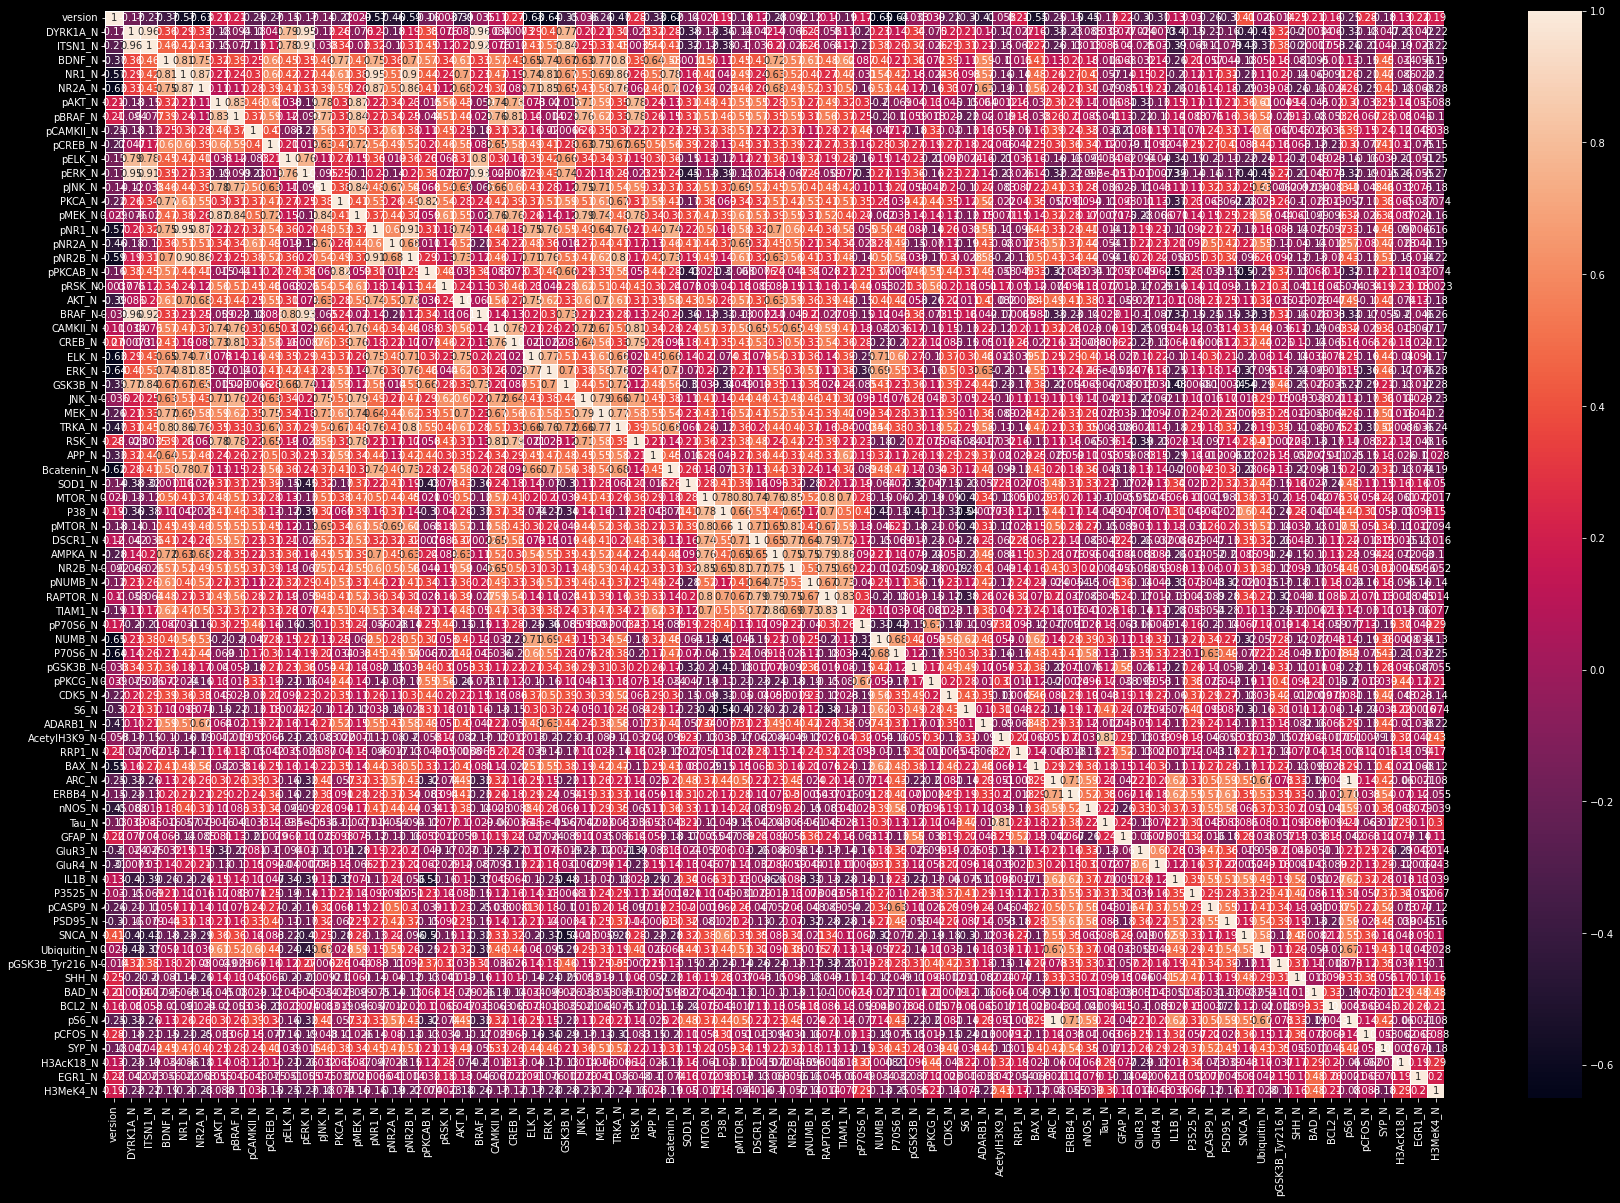

In [66]:
#correlation heatmap
plt.figure(figsize=(30,20))
sns.heatmap(mice_updated[mice_updated.columns[1:78]].corr(), annot=True, linewidth=0.5)

<Figure size 2160x1440 with 0 Axes>

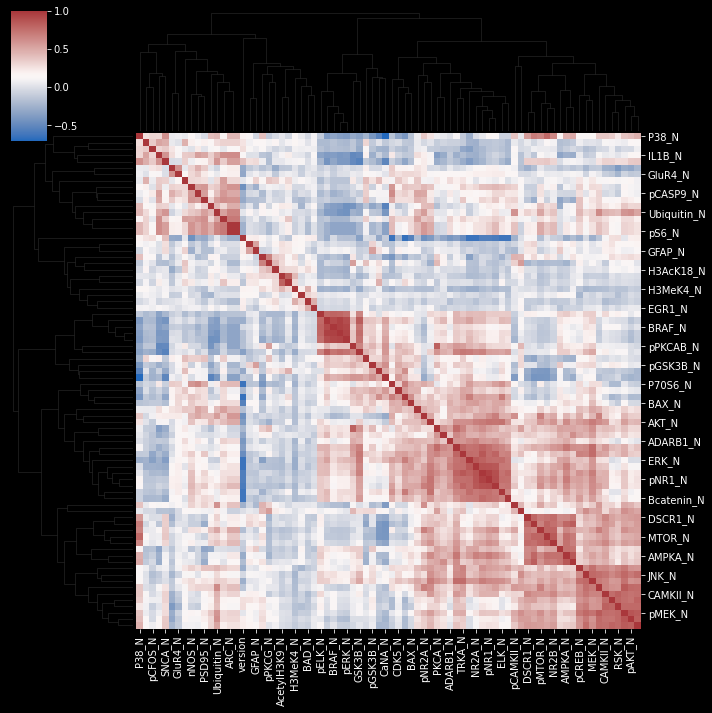

In [67]:
#clustermap
plt.figure(figsize=(30,20))
sns.clustermap(mice_updated.corr(),cmap='vlag');

## 3)Feature Scaling

In [68]:
# Normalization using MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(x_scaled, columns=features.columns)

## 4) Feature Selection

### Correlation

#### Finding and removing highly correlated features

In [69]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    display(corr_matrix.style.background_gradient(cmap='rainbow'))
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [70]:
# Correlation greater than 70% to be removed
corr_features = correlation(features_scaled, 0.8)

In [71]:
feat = features_scaled.drop(corr_features, axis=1)

In [72]:
imp_attr = feat.columns
feat.shape

(1077, 58)

In [73]:
cat = sorted(list(target.unique()))
cat

['c-CS-m',
 'c-CS-s',
 'c-SC-m',
 'c-SC-s',
 't-CS-m',
 't-CS-s',
 't-SC-m',
 't-SC-s']

## 5) Split Dataset into Training and Testing Sets

In [74]:
# 70% -> Train, 10% -> Validation, 20% -> Test

# Test(20/100), Rest(80/100) Split from complete
xxx, x_test, yyy, y_test = train_test_split(feat, target, test_size = 0.2, random_state = 30)

# Train(70/80), Validation(10/80) split from Rest
x_train, x_val, y_train, y_val = train_test_split(xxx, yyy, test_size = 0.125, random_state = 42) 

# Training

## 6) Machine Learning Models

In [75]:
results = {} #dictionary to store accuracy and f1-score of models

### Logistic Regression

accuracy with Logistic Regression:   0.9259259259259259
f1_score with Logistic Regression:   0.9258088080501873


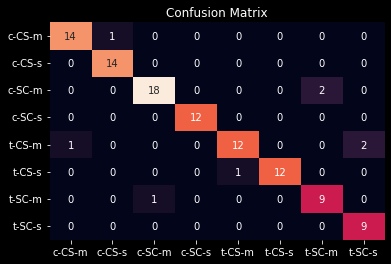

In [76]:
lr = LogisticRegression(solver='liblinear') 
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_val)

acc_lr = accuracy_score(y_val, pred_lr)
f1_lr = f1_score(y_val, pred_lr, average='weighted')

results['Logistic Regression'] = [acc_lr, f1_lr]

print('accuracy with Logistic Regression:  ', acc_lr)
print('f1_score with Logistic Regression:  ', f1_lr)

sns.heatmap(confusion_matrix(y_val,pred_lr),
            xticklabels=cat, yticklabels=cat,
            annot=True, fmt='1d', cbar=False);
plt.title('Confusion Matrix');

### K- Nearest neighbor classifier

accuracy with 1st set:   1.0
f1_score with 1st set:   1.0


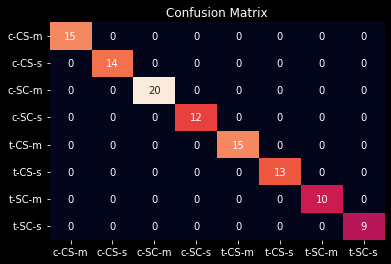

In [77]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_val)

acc_knn = accuracy_score(y_val, pred_knn)
f1_knn = f1_score(y_val, pred_knn, average='macro')

results['K-Nearest Neighbors'] = [acc_knn, f1_knn]

print('accuracy with 1st set:  ', acc_knn)
print('f1_score with 1st set:  ', f1_knn)

sns.heatmap(confusion_matrix(y_val,pred_knn),
            xticklabels=cat, yticklabels=cat,
            annot=True, fmt='1d', cbar=False);
plt.title('Confusion Matrix');

### Decision Tree Classifier

accuracy with 1st set:   0.8518518518518519
f1_score with 1st set:   0.8635007441459055


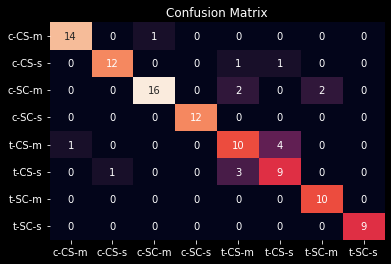

In [78]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
pred_tree = tree.predict(x_val)

acc_tree = accuracy_score(y_val, pred_tree)
f1_tree = f1_score(y_val, pred_tree, average='macro')

results['Decision Tree'] = [acc_tree, f1_tree]

print('accuracy with 1st set:  ', acc_tree)
print('f1_score with 1st set:  ', f1_tree)

sns.heatmap(confusion_matrix(y_val,pred_tree),
            xticklabels=cat, yticklabels=cat,
            annot=True, fmt='1d', cbar=False);
plt.title('Confusion Matrix');

### Random Forest Classifier

accuracy with 1st set:   0.9629629629629629
f1_score with 1st set:   0.9638655848333268


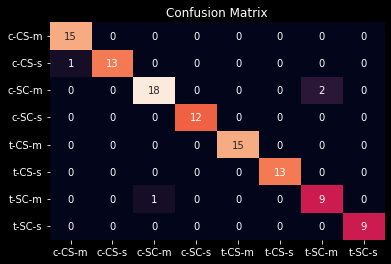

In [79]:
rf = RandomForestClassifier(n_estimators=1000,max_depth=8,random_state=33)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_val)

acc_rf = accuracy_score(y_val, pred_rf)
f1_rf = f1_score(y_val, pred_rf, average='macro')

results['Random Forest'] = [acc_rf, f1_rf]

print('accuracy with 1st set:  ', acc_rf)
print('f1_score with 1st set:  ', f1_rf)

sns.heatmap(confusion_matrix(y_val,pred_rf),
            xticklabels=cat, yticklabels=cat,
            annot=True, fmt='1d', cbar=False);
plt.title('Confusion Matrix');

### Ada Boost Classifier 

accuracy with 1st set:   0.8333333333333334
f1_score with 1st set:   0.8422116298704321


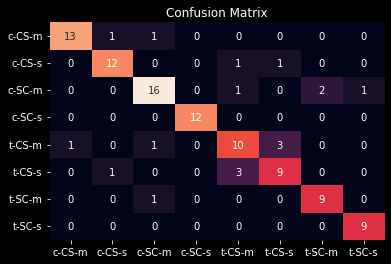

In [80]:
ada = AdaBoostClassifier(base_estimator=tree,n_estimators=100,random_state=3)
ada.fit(x_train,y_train)
pred_ada = ada.predict(x_val)

acc_ada = accuracy_score(y_val, pred_ada)
f1_ada = f1_score(y_val, pred_ada, average='macro')

results['AdaBoost Tree'] = [acc_ada, f1_ada]

print('accuracy with 1st set:  ', acc_ada)
print('f1_score with 1st set:  ', f1_ada)

sns.heatmap(confusion_matrix(y_val,pred_ada),
            xticklabels=cat, yticklabels=cat,
            annot=True, fmt='1d', cbar=False);
plt.title('Confusion Matrix');

In [81]:
#display performance of models in a dataframe 
pd.DataFrame(data=results.values(),index=results.keys(),columns=['accuracy','f1-score'])

accuracy  f1-score
Logistic Regression  0.925926  0.925809
K-Nearest Neighbors  1.000000  1.000000
Decision Tree        0.851852  0.863501
Random Forest        0.962963  0.963866
AdaBoost Tree        0.833333  0.842212

## 7) Hyperparameter Tuning and Model Fitting

### GridSearchCV for Logistic Regression

In [82]:
score = {}

In [83]:
grid = {
    'solver':['libilinear', 'sag', 'saga'],
    'C': np.logspace(0.001,3,7),
    'max_iter':[100, 1000, 2500, 5000]
}

if grid['solver'] == 'liblinear':
    grid['penalty'] = ['l1', 'l2']
elif grid['solver'] == 'sag':
    grid['penalty'] = ['l2', 'none']
elif grid['solver'] == 'saga':
    grid['penalty'] = ['elasticnet', 'l1', 'l2', 'none']



In [84]:
log_gs_cv = GridSearchCV(LogisticRegression(), param_grid=grid, cv=3, verbose=True,n_jobs=1)
log_gs = log_gs_cv.fit(x_train, y_train)
log_gs.best_estimator_

Fitting 3 folds for each of 84 candidates, totalling 252 fits


C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

LogisticRegression(C=100.07678229895993, max_iter=1000, solver='sag')

In [85]:
print (f'Accuracy : {log_gs.score(x_val,y_val):.3f}')

Accuracy : 0.991


### Model Fitting for Logistic Regression

In [86]:
log_gs.best_estimator_

LogisticRegression(C=100.07678229895993, max_iter=1000, solver='sag')

In [87]:
lr = log_gs.best_estimator_
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_val)

acc_lr = accuracy_score(y_val, pred_lr)
f1_lr = f1_score(y_val, pred_lr, average='weighted')
roc_auc_lr = roc_auc_score(y_test, lr.predict_proba(x_test), multi_class='ovr')

score['Logistic Regression'] = [acc_lr, f1_lr, roc_auc_lr]

print('accuracy:  ', acc_lr)
print('f1_score:  ', f1_lr)
print('ROC-AUC score:', roc_auc_lr)

accuracy:   0.9907407407407407
f1_score:   0.990842490842491
ROC-AUC score: 0.9998549391518058


### GridSearchCV for K-Nearest Neighbor

In [88]:
grid = [{"n_neighbors":np.arange(1,50)}]

In [89]:
clf_knn = GridSearchCV(KNeighborsClassifier(), param_grid=grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
best_clf_knn = clf_knn.fit(x_train, y_train)
best_clf_knn.best_estimator_

Fitting 10 folds for each of 49 candidates, totalling 490 fits


KNeighborsClassifier(n_neighbors=1)

In [90]:
print (f'Accuracy : {best_clf_knn.score(x_val,y_val):.3f}')

Accuracy : 1.000


### Model Fitting for K-Nearest Neighbor

In [91]:
knn = best_clf_knn.best_estimator_
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_val)

acc_knn = accuracy_score(y_val, pred_knn)
f1_knn = f1_score(y_val, pred_knn, average='macro')
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(x_test), multi_class='ovr')

score['KNN'] = [acc_knn, f1_knn, roc_auc_knn]

print('accuracy :  ', acc_knn)
print('f1_score :  ', f1_knn)
print('ROC-AUC score:', roc_auc_knn)

accuracy :   1.0
f1_score :   1.0
ROC-AUC score: 1.0


### RandomizedCV for Random Forest

In [92]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 2002, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [93]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 223, 445, 668, 890,
                                                         1112, 1335, 1557, 1779,
                                                         2002]},
                   random_state=42)

In [94]:
print(rf_random.best_score_)

0.9827357237715804


In [95]:
print(rf_random.best_params_)

{'n_estimators': 445, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}


In [96]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_split=5, n_estimators=445)

### Model Fitting for Random Forest

In [97]:
rf = rf_random.best_estimator_
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_val)

acc_rf = accuracy_score(y_val, pred_rf)
f1_rf = f1_score(y_val, pred_rf, average='macro')
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(x_test), multi_class='ovr')

score['Random Forest'] = [acc_rf, f1_rf, roc_auc_rf]

print('accuracy :  ', acc_rf)
print('f1_score :  ', f1_rf)
print('ROC-AUC score:', roc_auc_rf)

accuracy :   0.9814814814814815
f1_score :   0.9817103844496283
ROC-AUC score: 0.9998987854251012


### GridSearchCV for AdaBoost

In [98]:
grid_params = {'n_estimators': [100,200,300]}

tree = DecisionTreeClassifier()
ada_boost = AdaBoostClassifier(base_estimator=tree)

datagrid_object = GridSearchCV(estimator = ada_boost, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)
datagrid_object.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1, param_grid={'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [99]:
print(datagrid_object.best_score_)

0.8154050464807435


In [100]:
print(datagrid_object.best_params_)

{'n_estimators': 100}


In [101]:
datagrid_object.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

### Model Fitting for AdaBoost

In [102]:
ada = datagrid_object.best_estimator_
ada.fit(x_train,y_train)
pred_ada = ada.predict(x_val)

acc_ada = accuracy_score(y_val, pred_ada)
f1_ada = f1_score(y_val, pred_ada, average='macro')
roc_auc_ada = roc_auc_score(y_test, ada.predict_proba(x_test), multi_class='ovr')

score['Ada Boost'] = [acc_ada, f1_ada, roc_auc_ada]

print('accuracy :  ', acc_ada)
print('f1_score :  ', f1_ada)
print('ROC-AUC score:', roc_auc_ada)

accuracy :   0.8518518518518519
f1_score :   0.8572433238268085
ROC-AUC score: 0.8852906511230906


In [103]:
scores_df = pd.DataFrame(data=score.values(),index=score.keys(),columns=['accuracy', 'F1-score', 'ROC-AUC score'])
scores_df

accuracy  F1-score  ROC-AUC score
Logistic Regression  0.990741  0.990842       0.999855
KNN                  1.000000  1.000000       1.000000
Random Forest        0.981481  0.981710       0.999899
Ada Boost            0.851852  0.857243       0.885291

* **KNN** gives 100% reults on our dataset, probably it may be an **overfitting model**.
* **Random Forest** has given **better results and stability** as well as **best ROC-AUC score**. 

##### Thus we select Random Forest as our final model.

In [104]:
#pickle.dump(rf, open('model.sav','wb') )

# Testing

In [105]:
df = pd.concat([features_scaled, target], axis=1).sample(72)
df

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
431   0.103561  0.113353  0.474149  0.322070  0.258553  0.465489  0.532366   
750   0.083163  0.197338  0.648012  0.601869  0.558208  0.420156  0.463640   
470   0.093310  0.129761  0.564253  0.499987  0.410066  0.359483  0.505885   
580   0.202717  0.238211  0.556985  0.365514  0.264503  0.364198  0.498043   
793   0.055444  0.109159  0.631884  0.443386  0.201289  0.543884  0.632609   
977   0.145687  0.250652  0.683961  0.531450  0.396848  0.392769  0.531517   
878   0.120944  0.186909  0.429330  0.273189  0.205549  0.246751  0.334216   
287   0.072309  0.121069  0.628399  0.508239  0.407276  0.343665  0.456081   
487   0.049479  0.082686  0.466715  0.473071  0.323227  0.339849  0.453230   
49    0.140779  0.188271  0.696226  0.652184  0.641807  0.333420  0.407609   
766   0.062375  0.141178  0.759468  0.558626  0.544766  0.483047  0.575698   
137   0.262611  0.297219  0.827395  0.589847  0.403049  0.329163  0.498449   
652   0.269506  0.277756  0.644162  0.449090  0.392223  0.371045  0.485406   
985   0.092911  0.138654  0.478589  0.277772  0.155079  0.382706  0.499328   
622   0.226589  0.206091  0.328950  0.159962  0.135895  0.262899  0.445751   
479   0.070004  0.115471  0.562540  0.379247  0.199215  0.493219  0.687893   
591   0.138896  0.180745  0.470575  0.379547  0.234994  0.296794  0.481479   
278   0.039492  0.079844  0.492798  0.428012  0.239835  0.422896  0.470984   
794   0.082690  0.129369  0.647457  0.461162  0.254881  0.578154  0.701998   
18    0.224388  0.222660  0.631490  0.507824  0.480007  0.346460  0.483968   
122   0.257546  0.325806  0.720693  0.676657  0.467587  0.388126  0.497870   
1020  0.089075  0.135915  0.681550  0.567986  0.443793  0.389328  0.607218   
792   0.056206  0.117477  0.502271  0.420627  0.198865  0.544438  0.660187   
418   0.077929  0.109786  0.381286  0.259398  0.156922  0.285320  0.331439   
132   0.154550  0.183648  0.497712  0.362437  0.191568  0.483477  0.694723   
243   0.072156  0.083592  0.513302  0.426972  0.437589  0.326400  0.446158   
376   0.165825  0.219214  0.588638  0.518036  0.623757  0.206206  0.307837   
230   0.064872  0.104906  0.418451  0.366447  0.324062  0.308757  0.424036   
560   0.040264  0.057160  0.634604  0.415410  0.451619  0.329344  0.382067   
603   0.118925  0.141849  0.308504  0.126195  0.129709  0.255868  0.313162   
501   0.050066  0.078080  0.421156  0.394444  0.214933  0.264059  0.384206   
507   0.042068  0.046855  0.390968  0.276488  0.116001  0.342371  0.477680   
557   0.051760  0.092237  0.704713  0.472790  0.474999  0.356365  0.468747   
283   0.027100  0.074479  0.374880  0.390929  0.189348  0.429272  0.410239   
92    0.128974  0.168540  0.647147  0.570347  0.401150  0.281724  0.389067   
181   0.028251  0.065661  0.000000  0.392944  0.379803  0.306457  0.356984   
789   0.065038  0.125885  0.465913  0.477877  0.251998  0.437277  0.600793   
176   0.050733  0.066894  0.540365  0.349978  0.214546  0.443717  0.585328   
727   0.062950  0.120655  0.502353  0.414786  0.347959  0.378774  0.512393   
726   0.063443  0.117324  0.526514  0.431900  0.370521  0.394329  0.539789   
927   0.110895  0.190362  0.469022  0.333055  0.245479  0.334532  0.383975   
30    0.203394  0.300695  0.868575  0.659255  0.619346  0.283012  0.480416   
271   0.061361  0.113572  0.581100  0.517374  0.367249  0.411274  0.516004   
814   0.102780  0.167107  0.557938  0.451592  0.467359  0.395218  0.572583   
326   0.091672  0.113403  0.546407  0.345503  0.256638  0.367403  0.480665   
870   0.159500  0.260911  0.629292  0.454168  0.339980  0.257770  0.363763   
631   0.330475  0.346301  0.513038  0.460716  0.335647  0.235483  0.327706   
1054  0.062654  0.066007  0.429785  0.326953  0.187595  0.386286  0.481412   
86    0.119697  0.134822  0.375014  0.287340  0.267607  0.317013  0.445481   
403   0.046962  0.077806  0.364202  0.244748  0.167500  0.252879  0.326489   
843   0.123009  0.161734  0.

In [106]:
# test_df = df.drop(['class'], axis=1)
# rans = np.random.uniform(0, 1, test_df.shape)
# tests = test_df + rans
# tests.to_csv('test.csv', index=False)


In [107]:
X = pd.read_csv('test.csv')
xyz = pickle.load(open('model.pkl', 'rb'))

for row in X.iterrows():
    r = pd.DataFrame(columns=X.columns)
    r.loc[0] = row[1]
    preds = xyz.predict(r)

    cls = {
        0: 'c-CS-m',
        1: 'c-CS-s',
        2: 'c-SC-m',
        3: 'c-SC-s',
        4: 't-CS-m',
        5: 't-CS-s',
        6: 't-SC-m',
        7: 't-SC-s'
    }
    final_pred = np.vectorize(cls.get)(preds).reshape(-1, 1)

    print(final_pred)

[['c-CS-s']]
[['t-SC-m']]
[['c-CS-s']]
[['t-SC-m']]
[['c-CS-m']]
[['t-SC-m']]
[['t-SC-m']]
[['t-SC-s']]
[['c-CS-s']]
[['t-SC-s']]
[['t-SC-m']]
[['t-SC-m']]
[['c-CS-s']]
[['t-SC-m']]
[['t-SC-m']]
[['t-SC-s']]
[['c-CS-s']]
[['t-SC-m']]
[['c-CS-s']]
[['c-CS-s']]
[['c-CS-s']]
[['t-SC-s']]
[['c-CS-m']]
[['c-CS-s']]
[['t-SC-m']]
[['t-SC-m']]
[['t-SC-m']]
[['t-SC-m']]
[['t-SC-m']]
[['c-CS-s']]
[['c-CS-s']]
[['c-CS-s']]
[['t-SC-m']]
[['t-SC-m']]
[['t-SC-m']]
[['t-SC-s']]
[['c-CS-s']]
[['c-CS-s']]
[['t-SC-m']]
[['t-SC-m']]
[['c-CS-m']]
[['t-SC-s']]
[['t-SC-m']]
[['c-CS-s']]
[['t-SC-m']]
[['t-SC-m']]
[['t-SC-s']]
[['t-SC-m']]
[['c-CS-s']]
[['c-CS-s']]
[['t-SC-m']]
[['c-CS-s']]
[['c-CS-s']]
[['t-SC-m']]
[['c-CS-s']]
[['t-SC-m']]
[['t-SC-s']]
[['c-CS-s']]
[['t-SC-m']]
[['t-SC-m']]
[['t-SC-s']]
[['t-SC-m']]
[['c-CS-s']]
[['t-SC-m']]
[['c-CS-s']]
[['t-SC-s']]
[['c-CS-s']]
[['t-SC-m']]
[['t-SC-s']]
[['t-SC-m']]
[['t-SC-m']]
[['t-SC-m']]
